#**STATISTICAL PART**

Created on Monday 04 January 2021  

**Group 5 - Identification of new sources**  

@authors : C.P.M, Y.S., S.B.  

##**1/ Import of library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from wordcloud import WordCloud
from pandas import DataFrame
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
import pickle
import time
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


##**2/ File import**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
site = pd.read_csv('/content/drive/My Drive/Liste de sites.csv')

##**3/ Some statistics on the names of sites ...**

1 - Preparation of data

In [8]:
# Step 1 : get the domain (site name) of the site thanks to the url of the article  

def site_name(url):
    site = url.split("://")
    
    if site[0] == "https" or site[0] == "http":
        name_site = site[1]
    else:
        name_site = site[0]
    
    tab = name_site.split("/")
    name_site = tab[0]
    
    
    TLD = ["fr.","www.","www2.",".org",".fr",".eu",".net",".com"]
    
    for i in TLD:
        name_site = name_site.replace(i, "")
    
    return(name_site)

In [9]:
# Step 2 : save the file in a data frame
del site['URL source']
del site['Nom du site ']
site['nom_site'] = [site_name(i) for i in site['URL article']]
site.columns = ['art_url', 'nom_site']

In [10]:
# Step 3 : put all the names of the sites in a list ...

list_sites : list = []

for i in range (len(site)):
  name : str = site_name(str(site['art_url'][i]))
  name : str = name.upper() #puts in uppercase 
  name : str = name.replace(".", "_")
  name : str = name.replace(" ","_")
  name : str = name.replace("-","_")
  list_sites.append(name)

In [11]:
# Step 4 : ... or in a dataframe, as needed

df_sites = DataFrame(list_sites,columns=['nom_site'])

In [12]:
# function that retrieves the url of the site thanks to the url of the article article

def lienRacine(lienArticle) :
  split = lienArticle.split('/')
  return (split[0]+'//'+split[2])

def splitPath(lien) :
  listePath = lien.split('/')[3:]
  for mot in range(len(listePath)) :
    if listePath[mot] =='' :
      listePath.remove('')
  return listePath

## **4/ Our results concerning the sites :**

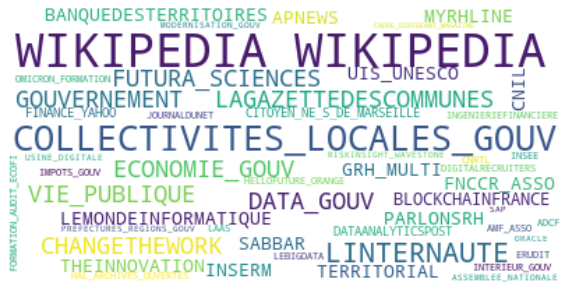

In [13]:
# 1st analysis: : Word cloud of the sites that appear most often 

df_site : list = df_sites['nom_site'].str.split(';', expand=False).tolist()
text = ';'.join([item for sublist in df_site if isinstance(sublist,list) for item in sublist])
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="white").generate(text)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
site_graph = site.copy()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


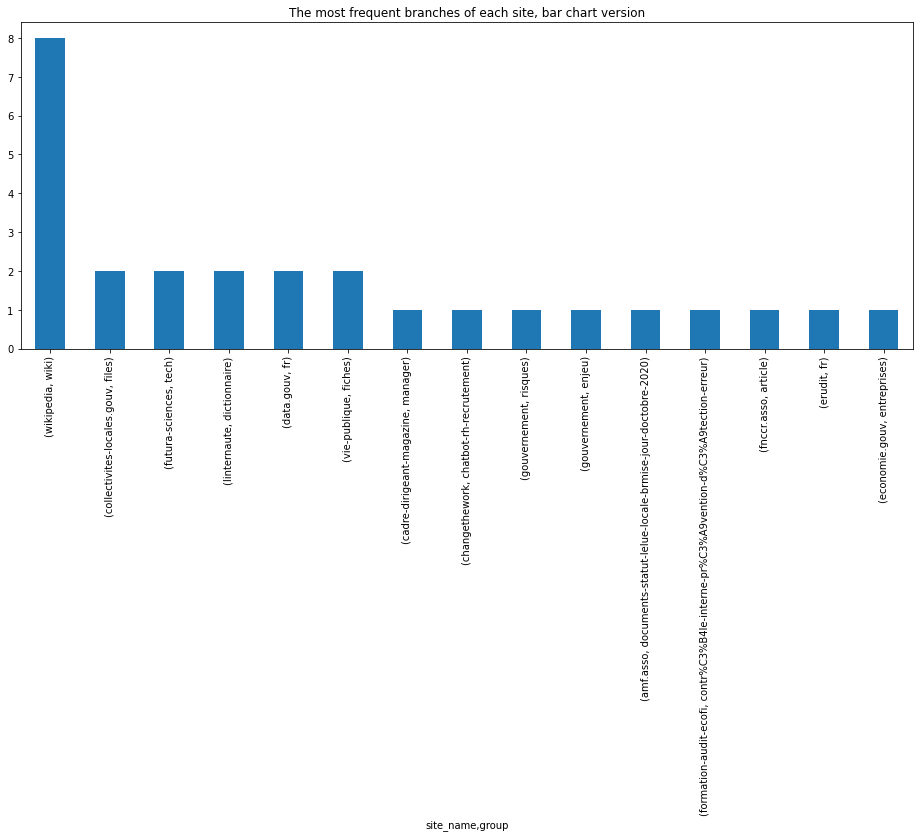

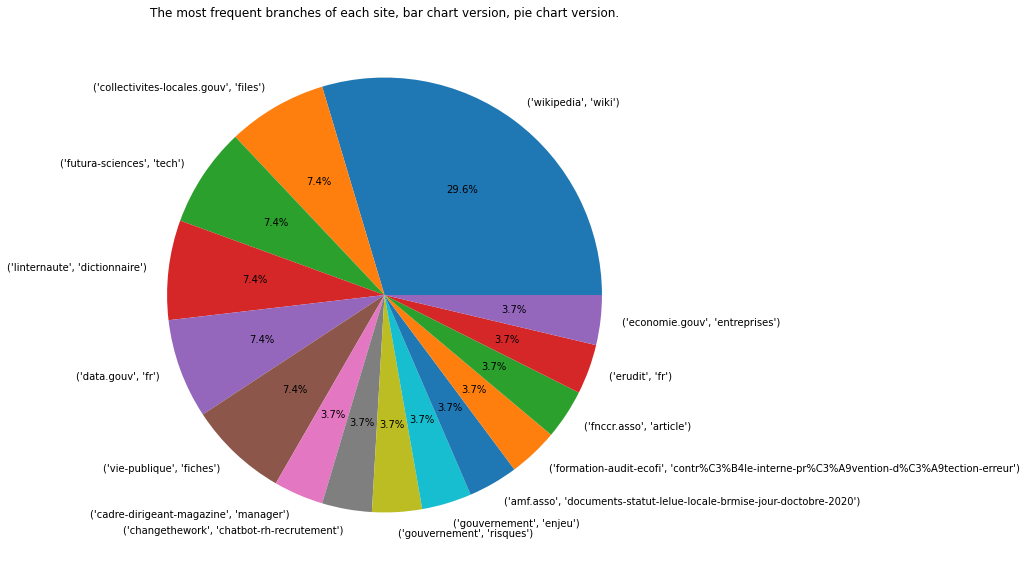

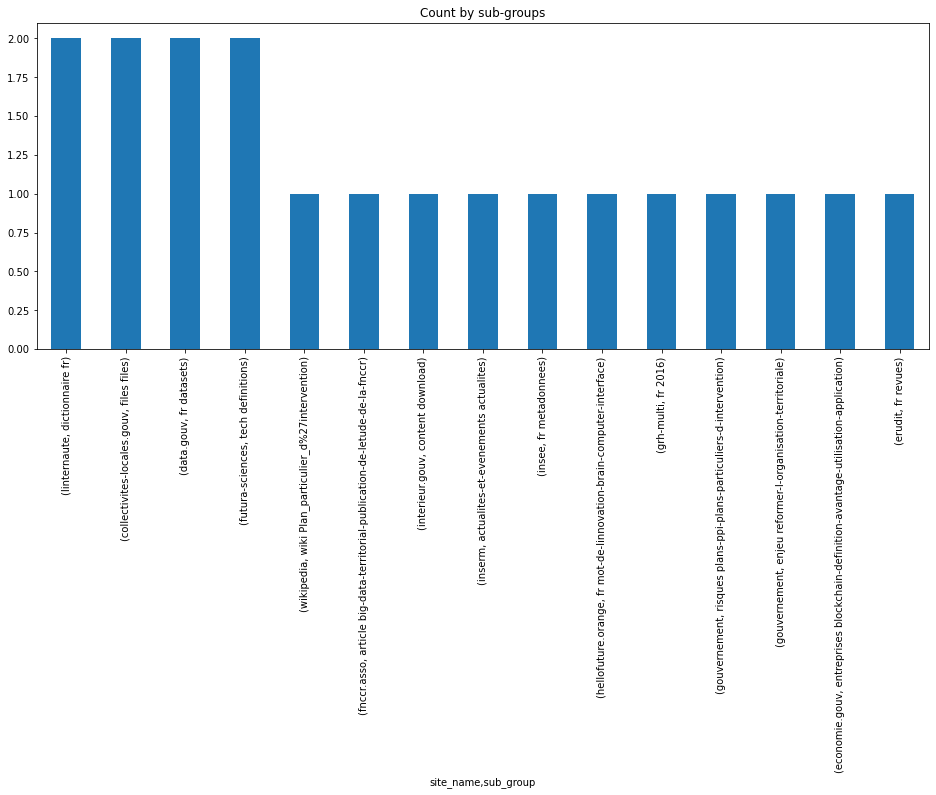

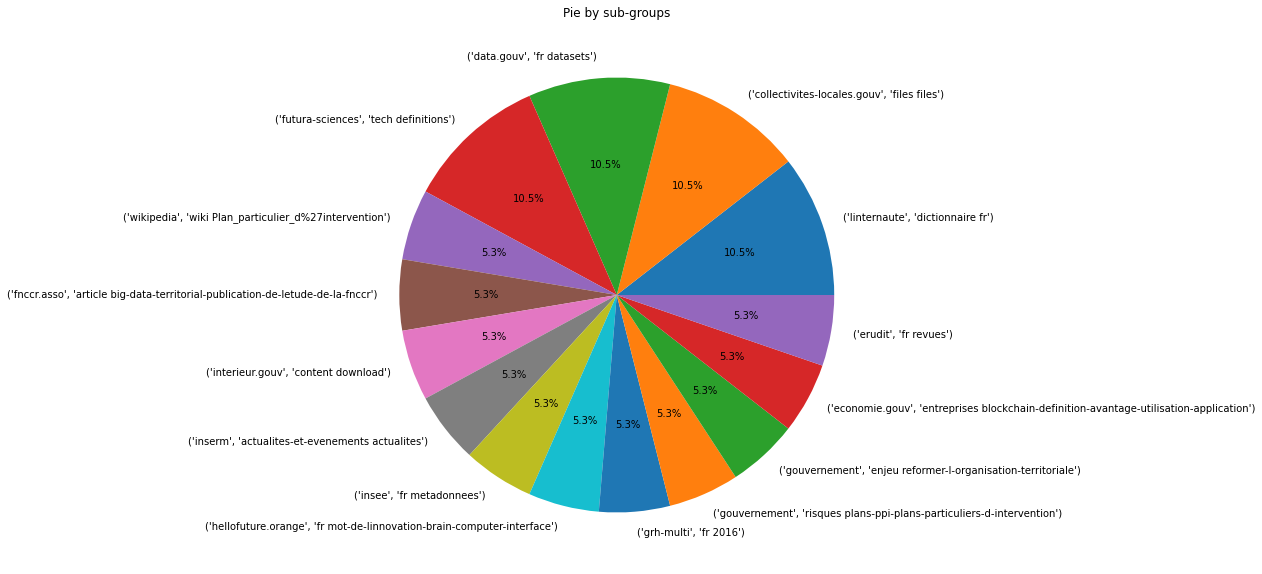

In [18]:
# 2nd analysis: the sub-domains of the most frequent sites

# function that makes breakdowns according to several indicators

def analyseGroupe(data,number=20) :
  data['site_name'] = [site_name(i) for i in data['art_url']]
  data['site_url'] = [lienRacine(i) for i in data['art_url']]
  data['paths_split'] = [splitPath(i) for i in data['art_url']]
  data['group'] = np.zeros(data.shape[0])
  data['sub_group'] = np.zeros(data.shape[0])

  for words in range(data['paths_split'].shape[0]):
    if (len(data['paths_split'].iloc[words]) >1 ) :
      data['group'].iloc[words] = data['paths_split'].iloc[words][0]
      data['sub_group'].iloc[words] = data['paths_split'].iloc[words][0] +' '+data['paths_split'].iloc[words][1]
    if (len(data['paths_split'].iloc[words]) == 1) :
      data['group'].iloc[words] = data['paths_split'].iloc[words][0]
      data['sub_group'].iloc[words] = np.nan

    if (len(data['paths_split'].iloc[words]) == 0) :
      data['group'].iloc[words] = np.nan
      data['sub_group'].iloc[words] = np.nan

  plt.title('The most frequent branches of each site, bar chart version')
  data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()


  plt.title('The most frequent branches of each site, bar chart version, pie chart version.')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number],  autopct='%1.1f%%', labels = data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number].index )
  plt.show()



  plt.title('Count by sub-groups')
  data.groupby(['site_name','sub_group'])['sub_group'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()
  plt.title('Pie by sub-groups')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['site_name','sub_group'])['sub_group'].count().sort_values(ascending=False).iloc[:number], autopct='%1.1f%%', labels = data.groupby(['nom_site','sub_group'])['sub_group'].count().sort_values(ascending=False).iloc[:number].index)
  plt.show()
 
  return data,data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number],data.groupby(['site_name','sub_group'])['sub_group'].count().sort_values(ascending=False).iloc[:number]

analyseGroupe(site_graph,15)
a=1

In [19]:
# 3rd analysis : Count the number of hits per site

# function to count the number of appearances of a site

def countSite(df):
  return df.groupby('nom_site').count()

Text(0.5, 1.0, 'NUMBER OF APPEARANCES PER SITE')

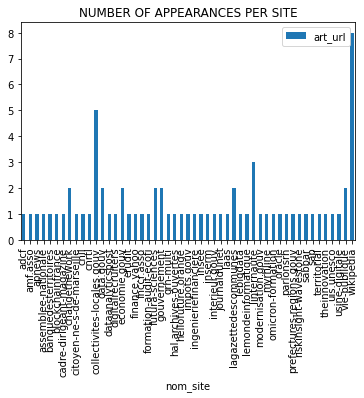

In [20]:
# Applying the function :

dataSite = countSite(site)
dataSite.plot(kind='bar')
plt.title('NUMBER OF APPEARANCES PER SITE')

In [22]:
# 4 analysis : Some basic statistics on the number of appearances

orderedDataSite = dataSite.sort_values('art_url', axis = 0, ascending = False)

def stats(dataSite):
  print("On average, each site appears", dataSite.art_url.mean(),"times.")
  print("The median of appearance of the sites is of", dataSite.art_url.median())
  print("The 10 most frequent sites are as follows :")
  print(orderedDataSite.head(10))

# we apply the function :

stats(orderedDataSite)

On average, each site appears 1.392156862745098 times.
The median of appearance of the sites is of 1.0
The 10 most frequent sites are as follows :
                            art_url
nom_site                           
wikipedia                         8
collectivites-locales.gouv        5
linternaute                       3
vie-publique                      2
lagazettedescommunes              2
changethework                     2
gouvernement                      2
futura-sciences                   2
data.gouv                         2
economie.gouv                     2


In [23]:
# Step 4: go back up the list of sites that are really related to our topic (so those that appear most often)

# 1- by putting a parameter on the x% of the most frequent ones :
def most_seen_sites_prop (dataSite,prop = 5) : # you can change the percentage in parameter 
  dataSite = dataSite.sort_values('art_url', axis = 0, ascending = False)
  numb : int = int((prop/100) * len(dataSite))
  mostSeen = dataSite.head(n=numb)
  moreThanOne = dataSite[dataSite.art_url != 1]
  return mostSeen, moreThanOne

# 2- by setting a parameter on the 20 most frequent ones 

def most_seen_sites_numb (dataSite , numb = 10) :
  dataSite = dataSite.sort_values('art_url', axis = 0, ascending = False)
  mostSeen = dataSite.head(n = numb)
  moreThanOne = dataSite[dataSite.art_url != 1]
  return mostSeen, moreThanOne

In [24]:
# the X% most frequent sites 

mostSeen, moreThanOne = most_seen_sites_prop(dataSite)

In [25]:
# # to get the list of sites and their number of appearances  

moreThanOne.to_csv('list_site_frequency.csv',index=True)

In [26]:
# if we want to read it from the code :

pd.read_csv('list_site_frequency.csv', index_col=0)

,art_url
nom_site,
wikipedia,8
collectivites-locales.gouv,5
linternaute,3
vie-publique,2
lagazettedescommunes,2
changethework,2
gouvernement,2
futura-sciences,2
data.gouv,2


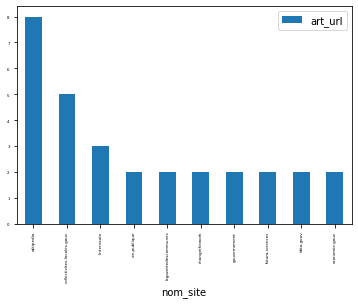

In [27]:
# Bar graph representing the number of times sites appear more than once 

moreThanOne.plot(kind="bar", fontsize=4)

In [29]:
# To have the curve function according to a percentage 

def mostFoundSites(orderedDF):
  listDiff : list = [] #liste des différences du nombre de site
  articleNumbers = orderedDF['art_url']
  for i in range (len(articleNumbers)-2):
    listDiff.append(articleNumbers[i]-articleNumbers[i+1])
  index : int = 0
  for i in listDiff:
    if (i > index) :
      index = i
  mostFound = orderedDF.iloc[:index+1]
  return mostFound

In [30]:
mostFoundSites(dataSite)

,art_url
nom_site,
adcf,1
amf.asso,1
apnews,1
assemblee-nationale,1


,art_url
nom_site,
wikipedia,8
collectivites-locales.gouv,5
linternaute,3
vie-publique,2
lagazettedescommunes,2
changethework,2
gouvernement,2
futura-sciences,2
data.gouv,2


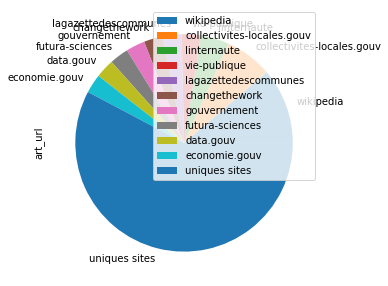

In [31]:
# Pie chart representing the frequency of occurrence of sites 

def pie_chart_site (dataSite,moreThanOne) :
  new_row : dict = {'nom_site':'uniques sites','art_url': len(dataSite) - len(moreThanOne)}
  all_sites = moreThanOne.copy()
  all_sites.loc['uniques sites'] = new_row
  plot = all_sites.plot.pie(y ='art_url', figsize = (5, 5))
  return all_sites
pie_chart_site(dataSite,moreThanOne)

### **Conclusion : With these initial analyses, we have noticed that the sites that stand out are not necessarily the most relevant. We therefore worked on functions to estimate the relevance of the article, or the site.**

# **5/ Relevancy score**

**1 -** Estimation of the relevance by taking the **popularity** of the site.


In [33]:
def relevance_popularity (dataSite , nb_links = 0) :
  dataSite = dataSite.sort_values('art_url', axis = 0, ascending = False)
  nb_links = nb_links + dataSite['art_url']
  return dataSite

In [34]:
relevance_popularity(dataSite)

,art_url
nom_site,
wikipedia,8
collectivites-locales.gouv,5
linternaute,3
vie-publique,2
lagazettedescommunes,2
changethework,2
gouvernement,2
futura-sciences,2
data.gouv,2


**2 -** Estimation of the relevance by taking the **words in common between those of the query, and those present in the title and in the Google summary** of the article.

In [35]:
data = pd.read_csv('/content/drive/My Drive/df_test.csv',delimiter=';')

In [36]:
# we uniform by removing capitals 
data['title'] = [x.lower() for x in data.title]
for i in range (len(data)):
  data['query'][i] = data['query'][i].lower()

In [37]:
# a cleanup is created to get the root, remove punctuation and empty words
def cleandesc(desc):
    sent = desc
    sent = "".join([x.lower() if x.isalpha()  else " " for x in sent])
    Porter=SnowballStemmer('french')
    sent = " ".join([Porter.stem(x) if x.lower() not in stop_words  else "" for x in sent.split()])
    sent = " ".join(sent.split())
    return sent
start_time=time.time()

In [38]:
# and the cleaning function is applied 
data['title']= [cleandesc(x.title) for x in data.itertuples()]
data['resume']= [cleandesc(x.resume) for x in data.itertuples()]
data['query']= [cleandesc(x.query) for x in data.itertuples()]
end_time=time.time()
print("total time : {} mn".format((end_time-start_time)/60))

total time : 0.07585131327311198 mn


In [40]:
# and now we do the function that will determine the relevance of the article according to the request 
data['cat_pertinence'] = ''
data['common_words'] = ''
relevance_query : list = [] #list that will store the relevance score,
#pertinence_j = [] #list that will store the number of the line concerned
def common_query_words(df) :
  df_relevance = pd.DataFrame(columns=['nb_row','score']).set_index('nb_row') #creation of a df allowing to have the score for each line,
  for j in range (len(df)): # for each line of the df,
    innov : int = 0 #initialization of a variable to count the number of words in the innovation lexicon 
    gest : int = 0 #...the same for the management lexicon
    separator_or : list = list(df['query'][j].split(' or ')) #we store all pairs of the request in a separator_or list 
    relevance_listing : list = [] #list to store the relevance scores for each of the couples
    list_find : list = [] #list to store words in common for each line,
    for k in range (len(separator_or)): #for each of these couples,
      nb_present : int = 0 #count the number of words in common
      separator_and : list = list(separator_or[k].split(' and ')) #we store all the words of the couple of the query in a separator_and list 
      for i in range (len(separator_and)): #for all the words in the query,
        if (df['title'][j].find(separator_and[i]) != -1) : #we look for it in the title, and if it's there... 
          if (i == 0): #if it's the first member of the couple, we've found a word of innovation 
            innov += 1
          else : #If not, a word of management 
            gest += 1
          nb_present = nb_present + 1 #increments the number of words in the query found.  
          list_find.append(separator_and[i]+";")
        if (df['resume'][j].find(separator_and[i]) != -1) : #then we look for it in the summary, and if it's there... 
          if (i == 0):
            innov += 1
          else :
            gest += 1
          nb_present += 1
          list_find.append(separator_and[i]+";") #... we put it in a list
          list_find = list(set(list_find))
      relevance_query : float = (nb_present / len(separator_and))*100 #we calculate the relevance score nb of words found / nb of total words in the query
      relevance_listing.append(relevance_query)
      str = ' '.join(list_find) #...
    df['common_words'][j]=str[:-1] #...we add the words found in the df
    df_relevance = df_relevance.append({'nb_row': j}, ignore_index=True)
    df_relevance['score'][j] = max(relevance_listing) #for each line, we take the best relevance of a couple,
    nb = df_relevance['score'][j]
    #and we categorize according to the score obtained :
    if (nb>=100) : #all the words of at least one couple are found,
      df['cat_pertinence'][j] = 'I&G'
    else :
      if (innov >= 1 and gest >= 1) : #words of innovation and gestion are found but not in the same couple,
        df['cat_pertinence'][j] = 'I&G but not from the same couple'
      elif (innov >= 1 and gest == 0) : #at least one word of innovation is found, but no gestion,
        df['cat_pertinence'][j] = 'I'
      elif (innov == 0 and gest >= 1): #at least one word of management is found but no innovation, 
        df['cat_pertinence'][j] = 'G'
      else :
        df['cat_pertinence'][j] = 'None' #no word is found 
  return(df)

In [41]:
df_relevance_query = common_query_words(data)
df_relevance_query

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,url,query,title,resume,mots,cat_pertinence,common_words
0,https://graylinegroup.com/machine-learning-and...,machin and innov,machin learning and the new innov paradigm,machin learning is very innov it,Machine,I&G,machin; innov
1,https://graylinegroup.com/machine-learning-and...,machin learning and innov,machin learning and the new innov paradigm,machin learning is very innov it,Machine learning,I&G,innov; machin learning


This first measure of relevance allows to classify scrapped articles into categories.
- If the title and/or its abstract contains all the words of at least a couple of the query, the article is highly relevant.
- If the title and/or its summary contains some of the words of the requests and at least one of the innovation and one of gestion, the article is relevant because it concerns our two themes.
- If the title and/or its summary contains some of the words from the requests corresponding to only one of the lexicons, the article may be somewhat relevant, but its relevance is less relevant because we do not have both themes represented.
- If the title and/or abstract contains none of the words of the query, then the article can be considered irrelevant.  

Idea : We could use weights to weight the importance of the crawled items.

**2 -** Estimation of relevance by the **position of the article in the crawl**

In [ ]:
#voir le code d'Amine